In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random data
data = np.random.rand(64, 64, 64)

# Create a figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate x, y, z coordinates for the data points
x, y, z = data.nonzero()

# Plot the points
ax.scatter(x, y, z, alpha=0.6, c='blue', marker='o')

# Set labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show plot
plt.show()


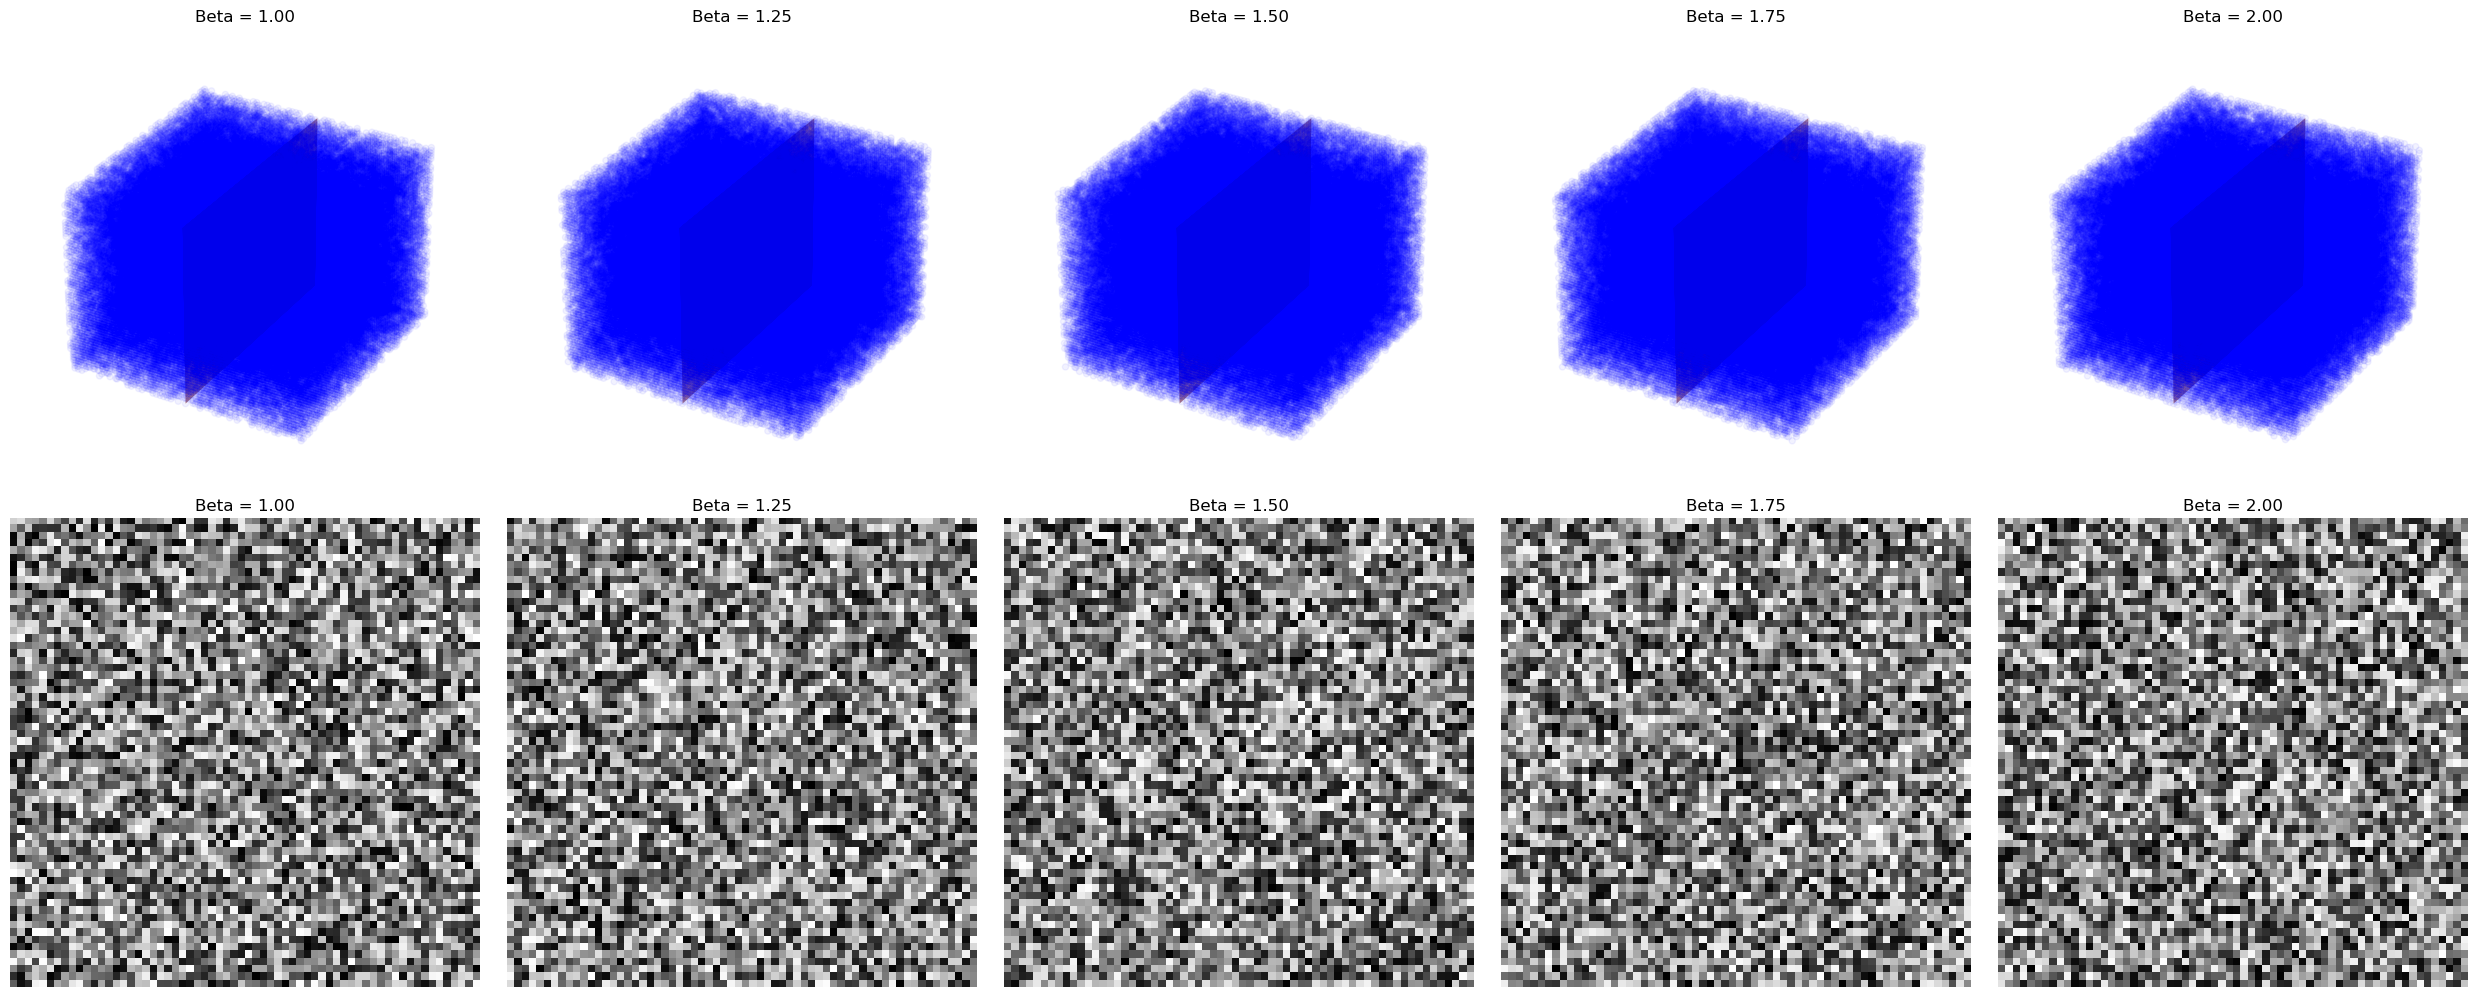

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.fftpack import fftn, ifftn

def colored_noise(shape, beta):
    """
    Generate colored noise with a given beta, affecting the color of the noise.
    Beta = 0: white noise
    Beta = 1: pink noise
    Beta = 2: red (Brownian) noise
    """
    random_noise = np.random.normal(size=shape)
    indices = [np.fft.fftfreq(n, d=1.0) for n in shape]
    freq_grid = np.sqrt(sum(np.square(np.meshgrid(*indices, indexing='ij', sparse=True))))
    freq_grid = np.sqrt(sum(np.square(np.meshgrid(*indices, indexing='ij', sparse=True))))

    freq_grid[0, 0, 0] = 1
    spectrum = fftn(random_noise) / np.power(freq_grid, beta / 2.0)
    return np.real(ifftn(spectrum))

# Create a larger figure for better visualization
fig = plt.figure(figsize=(25, 10))

betas = np.linspace(1, 2, 5)

for i, beta in enumerate(betas):
    noise_cube = np.random.rand(64, 64, 64)#colored_noise((64, 64, 64), beta)
    
    # Plot 3D noise cube in the first row
    ax = fig.add_subplot(2, 5, i+1, projection='3d')
    x, y, z = np.indices((64, 64, 64))
    mask = noise_cube > noise_cube.mean() + 0.2 * noise_cube.std()
    ax.scatter(x[mask], y[mask], z[mask], alpha=0.05, color='blue')
    
    # Highlight the slice in the 3D plot in the y-z plane
    Y, Z = np.meshgrid(range(64), range(64))
    X = np.full((64, 64), 32)
    ax.plot_surface(X, Y, Z, color='red', alpha=0.5)
    
    ax.set_title(f'Beta = {beta:.2f}')
    ax.axis('off')
    
    # Plot 2D slice in the second row
    ax2 = fig.add_subplot(2, 5, i+6)
    central_slice = noise_cube[:, :, 32]
    ax2.imshow(central_slice, cmap='gray')
    ax2.set_title(f'Beta = {beta:.2f}')
    ax2.axis('off')

plt.tight_layout()
plt.show()


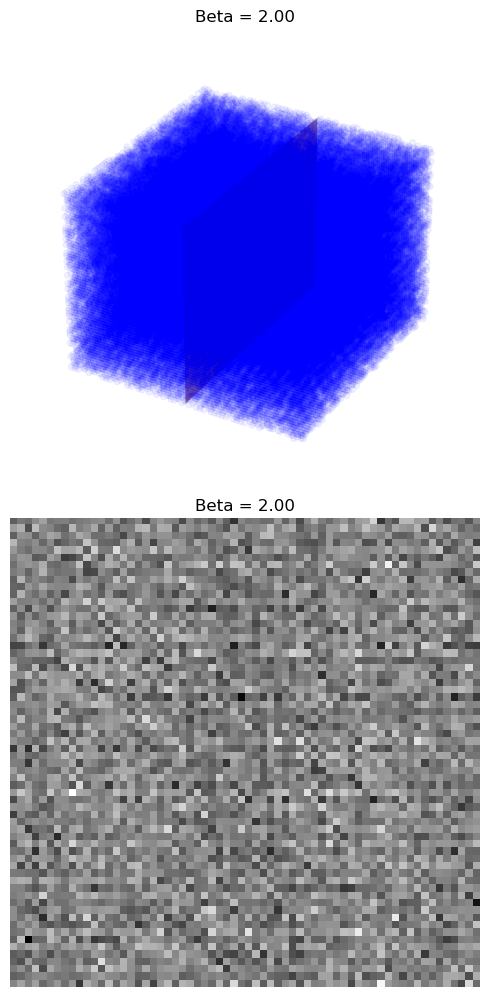

In [3]:
# Create a larger figure for better visualization
fig = plt.figure(figsize=(25, 10))

# Generate colored noise cube
def colored_noise(shape, beta):
    noise_cube = np.random.randn(*shape)
    noise_cube = np.fft.fftn(noise_cube)
    amplitude = np.abs(noise_cube)
    amplitude = np.power(amplitude, beta)
    noise_cube = np.fft.ifftn(noise_cube / amplitude)
    noise_cube = np.real(noise_cube)
    return noise_cube
noise_cube = colored_noise((64, 64, 64), beta)

# Plot 3D noise cube in the first row
ax = fig.add_subplot(2, 5, i+1, projection='3d')
x, y, z = np.indices((64, 64, 64))
mask = noise_cube > noise_cube.mean() + 0.2 * noise_cube.std()
ax.scatter(x[mask], y[mask], z[mask], alpha=0.05, color='blue')  # Existing points more transparent

# Highlight the slice in the 3D plot (placing it in the y-z plane)
Y, Z = np.meshgrid(range(64), range(64))
X = np.full((64, 64), 32)  # The slice is at x = 32, making it a y-z plane
# Highlighting the slice area
ax.plot_surface(X, Y, Z, color='red', alpha=0.5)

ax.set_title(f'Beta = {beta:.2f}')
ax.axis('off')

# Plot 2D slice in the second row
ax2 = fig.add_subplot(2, 5, i+6)
central_slice = noise_cube[:, :, 32]
ax2.imshow(central_slice, cmap='gray')
ax2.set_title(f'Beta = {beta:.2f}')
ax2.axis('off')

plt.tight_layout()
plt.show()



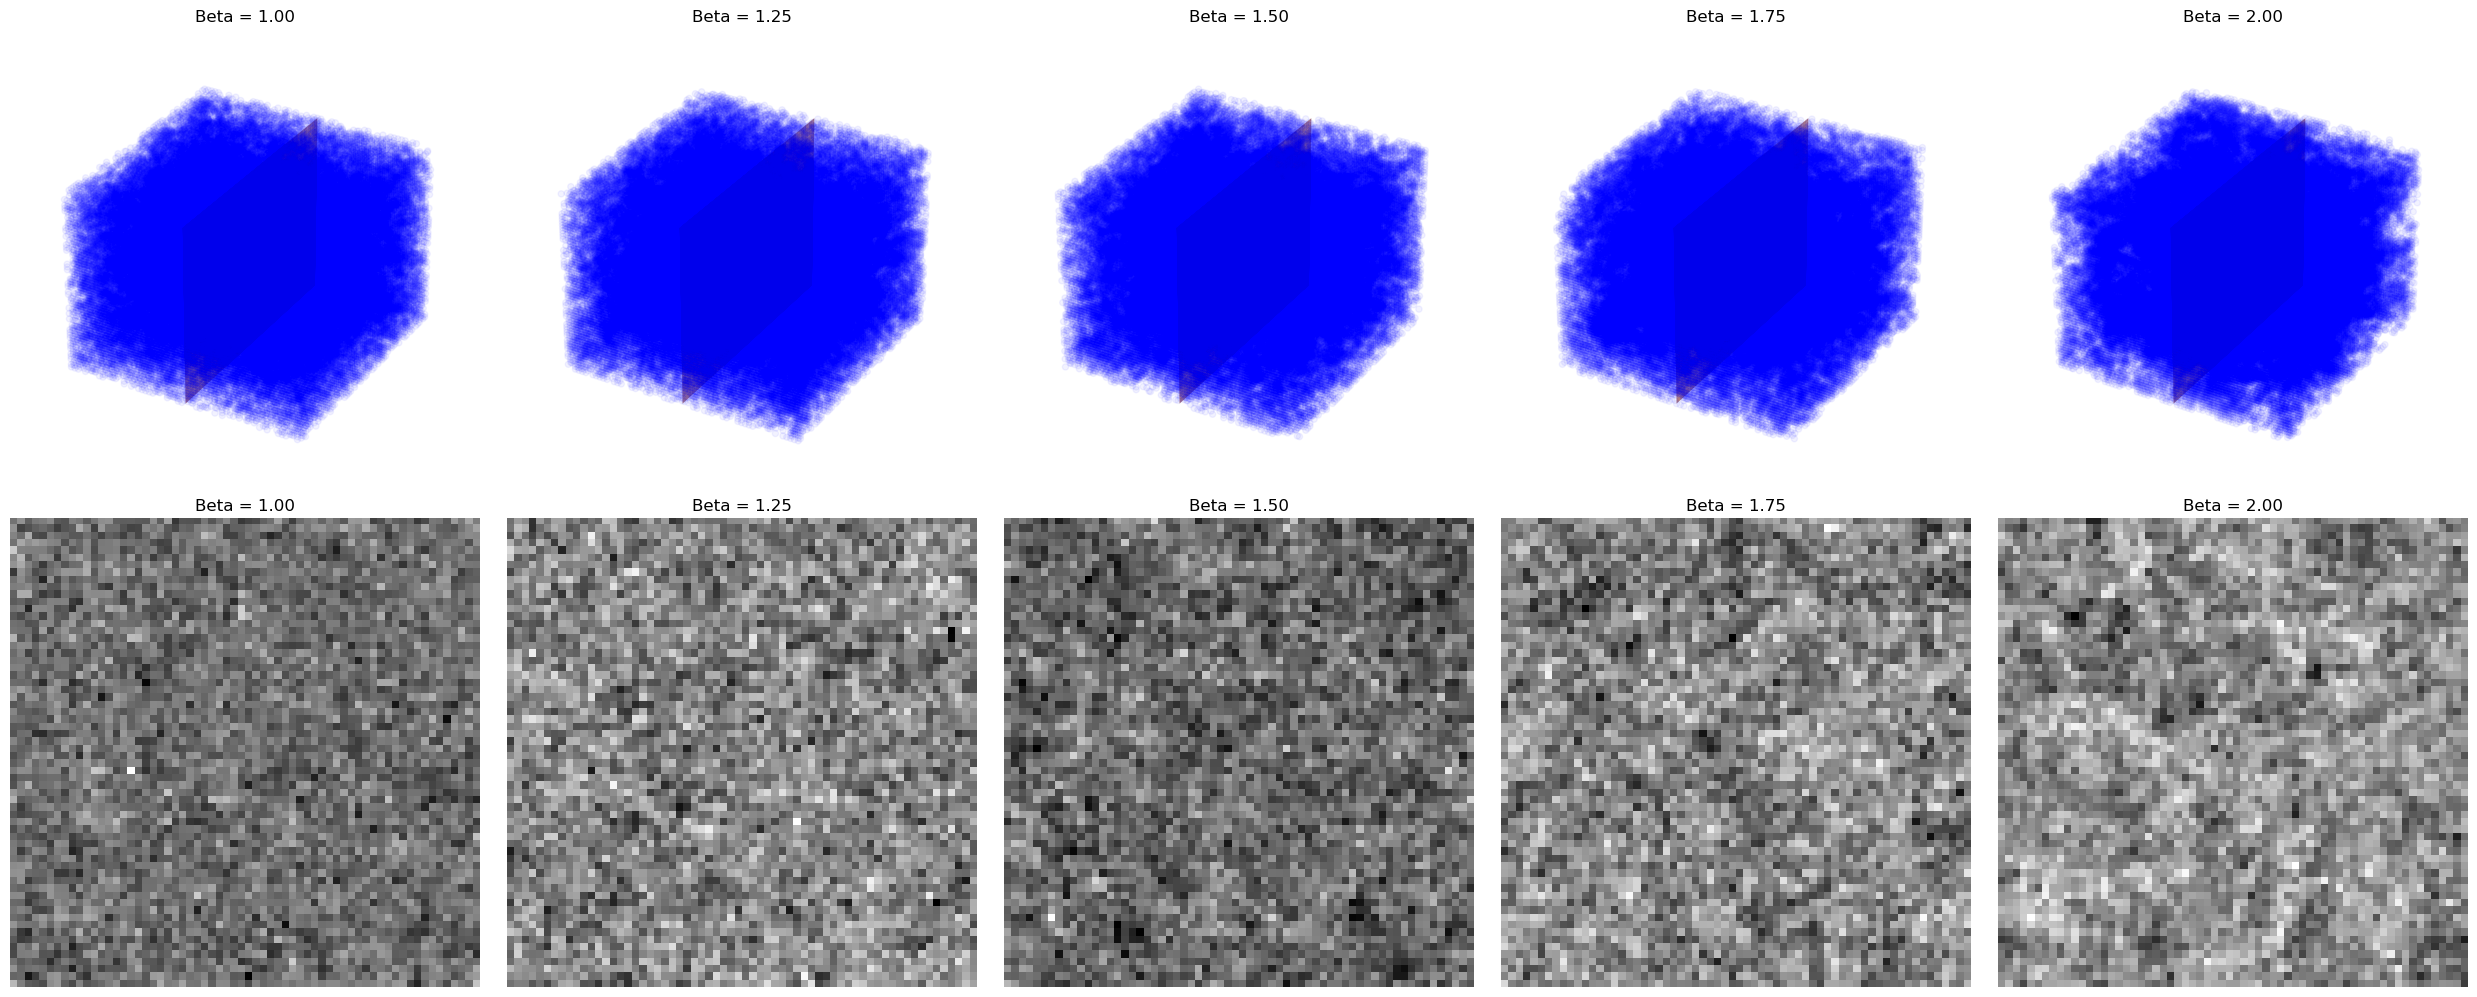

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.fftpack import fftn, ifftn

def colored_noise(shape, beta):
    random_noise = np.random.normal(size=shape)
    # Generate grid of indices
    kx = np.fft.fftfreq(shape[0]).reshape(-1, 1, 1)
    ky = np.fft.fftfreq(shape[1]).reshape(1, -1, 1)
    kz = np.fft.fftfreq(shape[2]).reshape(1, 1, -1)
    # Calculate frequency grid
    freq_grid = np.sqrt(kx**2 + ky**2 + kz**2)
    freq_grid[0, 0, 0] = 1  # Avoid division by zero
    # Apply color
    spectrum = fftn(random_noise) * np.power(freq_grid, -beta / 2.0)
    colored = np.real(ifftn(spectrum))
    return colored

# Create a larger figure for better visualization
fig = plt.figure(figsize=(25, 10))

betas = np.linspace(1, 2, 5)

for i, beta in enumerate(betas):
    noise_cube = colored_noise((64, 64, 64), beta)
    
    # Plot 3D noise cube in the first row
    ax = fig.add_subplot(2, 5, i+1, projection='3d')
    x, y, z = np.indices((64, 64, 64))
    mask = noise_cube > noise_cube.mean() + 0.2 * noise_cube.std()
    ax.scatter(x[mask], y[mask], z[mask], alpha=0.05, color='blue')
    
    # Highlight the slice in the 3D plot in the y-z plane
    Y, Z = np.meshgrid(range(64), range(64))
    X = np.full((64, 64), 32)
    ax.plot_surface(X, Y, Z, color='red', alpha=0.5)
    
    ax.set_title(f'Beta = {beta:.2f}')
    ax.axis('off')
    
    # Plot 2D slice in the second row
    ax2 = fig.add_subplot(2, 5, i+6)
    central_slice = noise_cube[:, :, 32]
    ax2.imshow(central_slice, cmap='gray')
    ax2.set_title(f'Beta = {beta:.2f}')
    ax2.axis('off')

plt.tight_layout()
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.fftpack import fftn, ifftn

def colored_noise(shape, beta):
    random_noise = np.random.normal(size=shape)
    kx = np.fft.fftfreq(shape[0]).reshape(-1, 1, 1)
    ky = np.fft.fftfreq(shape[1]).reshape(1, -1, 1)
    kz = np.fft.fftfreq(shape[2]).reshape(1, 1, -1)
    freq_grid = np.sqrt(kx**2 + ky**2 + kz**2)
    freq_grid[0, 0, 0] = 1  # Avoid division by zero
    spectrum = fftn(random_noise) * np.power(freq_grid, -beta / 2.0)
    colored = np.real(ifftn(spectrum))
    return colored

# Select the slice to plot

for selected_slice in range(64):#selected_slice = 15  # Change this value to select a different slice

  # Create a larger figure for better visualization
  fig = plt.figure(figsize=(25, 10))
  betas = np.linspace(1, 5, 5)

  for i, beta in enumerate(betas):
      noise_cube = colored_noise((64, 64, 64), beta)
      
      # Plot 3D noise cube in the first row
      ax = fig.add_subplot(2, 5, i+1, projection='3d')
      x, y, z = np.indices((64, 64, 64))
      mask = noise_cube > noise_cube.mean() + 0.2 * noise_cube.std()
      ax.scatter(x[mask], y[mask], z[mask], alpha=0.05, color='blue',s=0.3)
      
      # Extract the selected slice for 3D plotting
      central_slice = noise_cube[selected_slice, :, :]
      Y, Z = np.meshgrid(range(64), range(64))
      X = np.full(Y.shape, selected_slice)
      
      # Plot the selected slice on the 3D plot
      colors = plt.cm.viridis((central_slice - central_slice.min()) / (central_slice.max() - central_slice.min()))
      ax.plot_surface(X, Y, Z, facecolors=colors, rstride=1, cstride=1, shade=False,alpha=0.5)
      
      ax.set_title(f'Beta = {beta:.2f}')
      ax.axis('off')
      
      # Plot 2D slice in the second row
      ax2 = fig.add_subplot(2, 5, i+6)
      ax2.imshow(central_slice, cmap='viridis')
      ax2.set_title(f'Beta = {beta:.2f}')
      ax2.axis('off')

      plt.tight_layout()  
#   plt.savefig(f'noise_slice_{selected_slice}.png')  

#   plt.show()


/tmp/ipykernel_124036/2847611055.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(25, 10))
